In [ ]:
!pip install transformers

In [70]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from absl import logging
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [71]:
data = pd.read_csv('/content/drive/MyDrive/SummarizationData/Tweets.csv')
data

,Tweet:
0,Pi goes a long way at \n@NASA\n. It is used to...
1,While we're all in favor of a little extra pie...
2,Ready to take math to Mars and beyond on #PiD...
3,"Happy #PiDay! It’s March 14th, or 3.14 – also ..."
4,"When we look at a slice of the night sky, 𝞹 (o..."
5,"Pi takes us far in space exploration. In fact,..."
6,"""In May last year, I announced the creation of..."
7,"""When we launched the Solidarity Response Fund..."
8,"""The money collected will be used to suppress ..."
9,"""The plan calls for a total requirement of $1...."


In [72]:
#data preparation
data_nparray = np.array(data)
data_array = []
for tweet in data_nparray:
  data_array.append(tweet[0])

data_copy = data_array

In [73]:
final_data = []
for tweet in data_array:
  tweet = tweet.replace("@","")
  tweet = tweet.replace('"',"")
  tweet = tweet.replace("\n","")
  tweet = tweet.replace("#","")
  tweet = tweet.replace(":","")
  tweet = tweet.replace("...","")
  
  final_data.append(tweet)

In [ ]:
#embedding data
emb_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [92]:
embedded_final = emb_model(np.array(final_data))
embedded_final

pca = PCA(2)
embedded_final_new = pca.fit_transform(embedded_final)

In [100]:
#clustering
cluster_method = KMeans(3, random_state=1)

final_clusters = cluster_method.fit_predict(embedded_final_new)
final_clusters_unique = np.unique(final_clusters)

labels = cluster_method.labels_

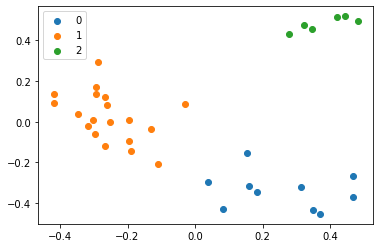

In [101]:
for i in final_clusters_unique:
  plt.scatter(embedded_final_new[final_clusters == i , 0] , embedded_final_new[final_clusters == i , 1] , label = i)
  
plt.legend()
plt.show()